# Pandas

**Pandas** - библиотека для обработки и анализа данных на `Python`. Позволяет работать с табличными данными, временными рядами и другими структурами данных, анализировать и визуализировать их. 

Основные особенности:
- богатый инструментарий для анализа данных - аггрегация, трансформация и т.п.
- возможность чтения и записи данных из\в разные форматы - `CSV`, `Excel`, СУБД
- совместимость со многими библиотеками из экосистемы `Python` для научных вычислений
- возможность работать и иерархическими данными


## Series

In [1]:
import numpy as np
import pandas as pd

Базовая структура данных - это `Series`. Интуитивно это типизированный вектор, каждый элемент которого имеет ассоциированную с ним некоторую уникальную метку. Набор меток, который привязан к `Series` называется индексом. `Series` можно создать из списка `Python` или из массива `NumPy`

In [2]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

по умолчанию в качестве индекса выступают упорядоченные целые числа, но можно использовать строки, даты, и многие другие объекты. 

In [3]:
s = pd.Series([1, 2, 3, 4], index=["a", "c", "b", "d"])
s

a    1
c    2
b    3
d    4
dtype: int64

Можно и прямо использовать словарь с аналогичным результатом

In [4]:
pd.Series({"a": 1, "b": 2, "c": 3, "d": 4})

a    1
b    2
c    3
d    4
dtype: int64

К элементам `Series` можно обращаться  по индексу

In [5]:
s["c"]

np.int64(2)

Так как индекс упорядоченный, мы можем обращаться к элементам в `Series` с помошью чисел, точно так же как мы это делали  в списках `Python` или массивав `NumPy`

In [6]:
s.iloc[2]

np.int64(3)

Можем даже использовать срезы, получаяновый объект `Series`

In [7]:
s[2:4]

b    3
d    4
dtype: int64

In [8]:
s["c":"d"]

c    2
b    3
d    4
dtype: int64

Из объекта `Series` можно получить `NumPy`-массив значений

In [9]:
s.to_numpy()

array([1, 2, 3, 4])

и значения индекса

In [10]:
s.index

Index(['a', 'c', 'b', 'd'], dtype='object')

Рассмотрим более интересный пример - загрузим CSV-файл с информацией о курсе Евро с 01.04.2017 ао 15.04.2017

In [11]:
# первые 5 строчек нашего файла
!head -n 5 data/eur.csv

2017-04-01,59.8107
2017-04-04,59.8953
2017-04-05,60.2427
2017-04-06,59.6948
2017-04-07,60.0827


Загружаем файл в `Series`

In [12]:
s = pd.read_csv("data/eur.csv", index_col=0, header=None, parse_dates=True).loc[:, 1]
s

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-05    60.2427
2017-04-06    59.6948
2017-04-07    60.0827
2017-04-08    60.5687
2017-04-11    60.7469
2017-04-12    60.3042
2017-04-13    60.2631
2017-04-14    60.2867
2017-04-15    59.7791
Name: 1, dtype: float64

In [13]:
s.index

DatetimeIndex(['2017-04-01', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-08', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15'],
              dtype='datetime64[ns]', name=0, freq=None)

Как мы видим, `Pandas` сама определила типы данных  (в том числе даты)

Мы можем получить даты, для которых курс Евро меньше 60

In [14]:
s < 60

0
2017-04-01     True
2017-04-04     True
2017-04-05    False
2017-04-06     True
2017-04-07    False
2017-04-08    False
2017-04-11    False
2017-04-12    False
2017-04-13    False
2017-04-14    False
2017-04-15     True
Name: 1, dtype: bool

Обратите внимание, что результат этой операции - новый `Series`, где индекс остается неизменным, а вместо курса евро - булевское значение. Наличие индекса - это основное отличие `Series` от обычных одномерных массивов `NumPy`

Следующая стандартная операция заключается в получии подмножество `Series` на основе некоторого условия. Получим подмножество, где курс меньше 60.

In [15]:
s[s < 60]

0
2017-04-01    59.8107
2017-04-04    59.8953
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Где курс меньше 60 после 4 апреля 2017 года

In [16]:
s[(s < 60) & (s.index > "2017-04-04")]

0
2017-04-06    59.6948
2017-04-15    59.7791
Name: 1, dtype: float64

Обратите внимание, что результат двух операций `s < 60` и `s.index > "2017-04-04"`  -- `Series` c логическими значениями. Мы совершаем между ними логическую операци "&" и получаем ещё один `Series` с логическими значениями.

## DataFrame

С помощью `Series` мы можем оперировать одномерными данными (как в примере выше: дата $\rightarrow$ курс евро). Но если данных больше, и мы хотим производить какой-то анализ на основе курса евро и курса доллара? Мы можем создать два объекта `Series`, но одновременная работа с ними может быть не очень удобной. 

**DataFrame** можно логически представить как именнованный набор объектов `Series` с одинаковым индексом. Если говорить более простым языком - это таблица, у каждой строки которой есть уникальное значение (индекс) и у каждого столбца - имя. Это чем-то напомнает `Excel`, только управлять таблицей мы будем из `Python`. Стоит отметить, что появление `DataFrame` инспирировано одноименной структурой данных из языка `R`.

`DataFrame` можно просто создать, передав в конструктор табличные данные и имена колонок

In [17]:
pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]], columns=["a", "b", "c"])

,a,b,c
0,1,2,3
1,4,5,6


Или аналогично по столбцам

In [18]:
pd.DataFrame(data={"a" : [1, 4], "b": [2, 5], "c": [3, 6]})

,a,b,c
0,1,2,3
1,4,5,6


Вместо списков, можно использовать массивы `NumPy` или `Series`

Давайте загрузим исторические данные по евро, доллару и британскому фунту. Наш файл (в формате `CSV`) выглядит так

In [19]:
!head -n 5 data/currencies.csv

DATE,EUR,USD,GBP
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.894,69.4986


c помощью параметров мы указываем как следует читать файл:
- `index_col=0` - индекс расположен в первой колонке (отсчет идёт, как обычно, с нуля). 
- `header=0` - заголовки таблицы на первой строке. Если наш файл не содержит заголовка, мы можем просто указать `header=False`, в этом случае колонки будут носить численные именования.


Чтобы не заграмождать экран, мы будем использовать метод `.head()`, который обрезает нашу таблицу до 5 строк. 

In [20]:
df = pd.read_csv("data/currencies.csv", index_col=0, header=0, parse_dates=[0])
df.head()


,EUR,USD,GBP
DATE,,,
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.8940,69.4986
2017-04-07,60.0827,56.4369,70.3655


## Доступ к данным

Мы можем получить один столбец, которые будет представим в виде объекта `Series`

In [21]:
df["USD"].head()

DATE
2017-04-01    55.9606
2017-04-04    56.1396
2017-04-05    56.5553
2017-04-06    55.8940
2017-04-07    56.4369
Name: USD, dtype: float64

Или срезать `DataFrame`, взяв только некоторые, интересные нам столбцы, получив новый `DataFrame`:

In [22]:
df[["USD", "GBP"]].head()

,USD,GBP
DATE,,
2017-04-01,55.9606,69.7605
2017-04-04,56.1396,70.3429
2017-04-05,56.5553,70.3548
2017-04-06,55.8940,69.4986
2017-04-07,56.4369,70.3655


мы можем создать новый столбец из старых. В данном случае посчитаем разницу между курсом фунта и евро в соответствующий день

In [23]:
df["GBP-EUR"] = df["GBP"] - df["EUR"]
df.head(5)

,EUR,USD,GBP,GBP-EUR
DATE,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498
2017-04-04,59.8953,56.1396,70.3429,10.4476
2017-04-05,60.2427,56.5553,70.3548,10.1121
2017-04-06,59.6948,55.8940,69.4986,9.8038
2017-04-07,60.0827,56.4369,70.3655,10.2828


Или можно посмотреть на сколько изменялся курс евро и доллара с прошлого дня с помощью операции сдвига

In [24]:
df["$\Delta$ EUR"] = df["EUR"] - df["EUR"].shift(1)
df["$\Delta$ USD"] = df["USD"] - df["USD"].shift(1)
df.head()

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-01,59.8107,55.9606,69.7605,9.9498,NaN,NaN
2017-04-04,59.8953,56.1396,70.3429,10.4476,0.0846,0.1790
2017-04-05,60.2427,56.5553,70.3548,10.1121,0.3474,0.4157
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-07,60.0827,56.4369,70.3655,10.2828,0.3879,0.5429


Доступ к строкам, столбцам, фильтрация осуществляется с помощью свойств **.loc**, **.iloc**, **.at**, **.iat** Допустим, мы хотим получить новый `DataFrame`, состоящий из строк, где изменение доллара и евро c прошлого дня отрицательные

In [25]:
# тут будет Series из булевский значений с тем же индексом
(df["$\Delta$ USD"] < 0) & (df["$\Delta$ EUR"] < 0)

DATE
2017-04-01    False
2017-04-04    False
2017-04-05    False
2017-04-06     True
2017-04-07    False
2017-04-08    False
2017-04-11    False
2017-04-12     True
2017-04-13     True
2017-04-14    False
2017-04-15     True
dtype: bool

In [26]:
# передаем его в **.loc**
df.loc[(df["$\Delta$ USD"] < 0) & (df["$\Delta$ EUR"] < 0)]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613
2017-04-12,60.3042,56.9552,70.7384,10.4342,-0.4427,-0.4344
2017-04-13,60.2631,56.7556,70.9502,10.6871,-0.0411,-0.1996
2017-04-15,59.7791,56.2945,70.4413,10.6622,-0.5076,-0.3074


In [27]:
# если интересуют отдельные столбцы

df.loc[(df["$\Delta$ USD"] < 0) & (df["$\Delta$ EUR"] < 0), ["EUR", "USD"]]

,EUR,USD
DATE,,
2017-04-06,59.6948,55.8940
2017-04-12,60.3042,56.9552
2017-04-13,60.2631,56.7556
2017-04-15,59.7791,56.2945


Если к данным нужно обратиться по номеру строки, то используется свойство **.iloc**

In [28]:
df.iloc[2:4]

,EUR,USD,GBP,GBP-EUR,$\Delta$ EUR,$\Delta$ USD
DATE,,,,,,
2017-04-05,60.2427,56.5553,70.3548,10.1121,0.3474,0.4157
2017-04-06,59.6948,55.8940,69.4986,9.8038,-0.5479,-0.6613


Для быстрого обращения к ячейке по номеру:

In [29]:
df.iloc[2, 0]

np.float64(60.2427)

Для доступа к ячейке по метке используется **.at**

In [30]:
df.at["2017-04-05", "EUR"]

np.float64(60.2427)

`Pandas` имеет большое количество функций для подсчет статистических характеристик наших данных. Например, посчитаем коэффицент корреляции между значениями доллара и евро

In [31]:
df["USD"].corr(df["EUR"])

np.float64(0.9529946342029497)

Или математическое ожидание курсов валют

In [32]:
df[["USD", "EUR", "GBP"]].mean()

USD    56.536664
EUR    60.152264
GBP    70.509236
dtype: float64

Можно сразу визуализировать наши данные, с помощью специальных функций (используется библиотека `matplotlib`)

### Примеры

In [33]:
df = pd.read_csv("data/currencies.csv", index_col=0, header=0, parse_dates=[0])
df.head(3)

,EUR,USD,GBP
DATE,,,
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548


In [34]:
# отдельная строка
df.loc["2017-04-05", :]

EUR    60.2427
USD    56.5553
GBP    70.3548
Name: 2017-04-05 00:00:00, dtype: float64

In [35]:
# отдельный столбец
df.loc[:, "USD"]
# или
df["USD"]

DATE
2017-04-01    55.9606
2017-04-04    56.1396
2017-04-05    56.5553
2017-04-06    55.8940
2017-04-07    56.4369
2017-04-08    56.9201
2017-04-11    57.3896
2017-04-12    56.9552
2017-04-13    56.7556
2017-04-14    56.6019
2017-04-15    56.2945
Name: USD, dtype: float64

In [36]:
# несколько строк
df.loc[["2017-04-05", "2017-04-06"]]

,EUR,USD,GBP
DATE,,,
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.8940,69.4986


In [37]:
# несколько столбцов
df.loc[:, ["USD", "EUR"]]
# или
df[["USD", "EUR"]]

,USD,EUR
DATE,,
2017-04-01,55.9606,59.8107
2017-04-04,56.1396,59.8953
2017-04-05,56.5553,60.2427
2017-04-06,55.8940,59.6948
2017-04-07,56.4369,60.0827
2017-04-08,56.9201,60.5687
2017-04-11,57.3896,60.7469
2017-04-12,56.9552,60.3042
2017-04-13,56.7556,60.2631


In [38]:
# набор строк и столбцов из диапазона
df.loc["2017-04-05":"2017-04-08", ["USD", "EUR"]]

,USD,EUR
DATE,,
2017-04-05,56.5553,60.2427
2017-04-06,55.8940,59.6948
2017-04-07,56.4369,60.0827
2017-04-08,56.9201,60.5687


In [39]:
# набор строк по условию
df.loc[df["EUR"] > 60.3]
# или
df[df["EUR"] > 60.3]

,EUR,USD,GBP
DATE,,,
2017-04-08,60.5687,56.9201,70.9281
2017-04-11,60.7469,57.3896,71.1746
2017-04-12,60.3042,56.9552,70.7384


### Группировка и агрегация

Процесс объединения данных в группы и трансформации/агрегации данных в группах

In [40]:
df = pd.DataFrame({"col1": ["a", "b", "a", "a", "b"], "col2": [1, 5, 7, 1, 2], "col3": range(5)})
df

,col1,col2,col3
0,a,1,0
1,b,5,1
2,a,7,2
3,a,1,3
4,b,2,4


Сгруппируем `DataFrame` по столбцу `col1` и подсчитаем сумму эелементов

In [41]:
df.groupby("col1").sum() # .mean() .var() .cumsum()

,col2,col3
col1,,
a,9,5
b,7,5


по двум колонкам

In [42]:
df.groupby(["col1", "col2"]).sum()

col3
col1 col2      
a    1        3
     7        2
b    2        4
     5        1

можно определить собственную функцию агрегации 

In [43]:
def our_agg_func(x: pd.Series):
    return x.mean()

df.groupby("col1", as_index=False).agg({"col2": "sum", "col3": our_agg_func})

,col1,col2,col3
0,a,9,1.666667
1,b,7,2.500000


если отдельные столбцы нужно агрегировать различными способами, то можно применять `pd.NamedAgg`

In [44]:
df.groupby("col1").agg(
    col2_min=pd.NamedAgg(column="col2", aggfunc="min"),
    col2_our=pd.NamedAgg(column="col2", aggfunc=our_agg_func),
    col3_sum=pd.NamedAgg(column="col3", aggfunc="sum")
)

,col2_min,col2_our,col3_sum
col1,,,
a,1,3.0,5
b,2,3.5,5


Результат группировки для конкретного значения

In [45]:
df.groupby("col1").get_group("a")

,col1,col2,col3
0,a,1,0
2,a,7,2
3,a,1,3


Данные в группах можно трансформировать, например подсчитать кумулятивную сумму

In [46]:
df

,col1,col2,col3
0,a,1,0
1,b,5,1
2,a,7,2
3,a,1,3
4,b,2,4


In [47]:
df.groupby("col1").cumsum()

,col2,col3
0,1,0
1,5,1
2,8,2
3,9,5
4,7,5


### Визуализация

<Axes: xlabel='DATE'>

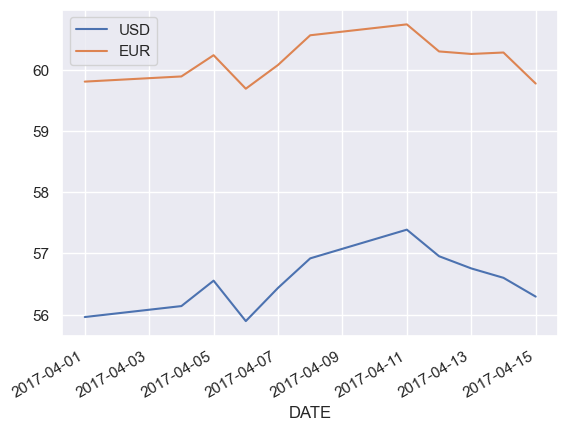

In [48]:
%matplotlib inline

import seaborn as sns
sns.set_theme()

df = pd.read_csv("data/currencies.csv", index_col=0, header=0, parse_dates=[0])
df[["USD", "EUR"]].plot()

a         Axes(0.1,0.15;0.363636x0.75)
b    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

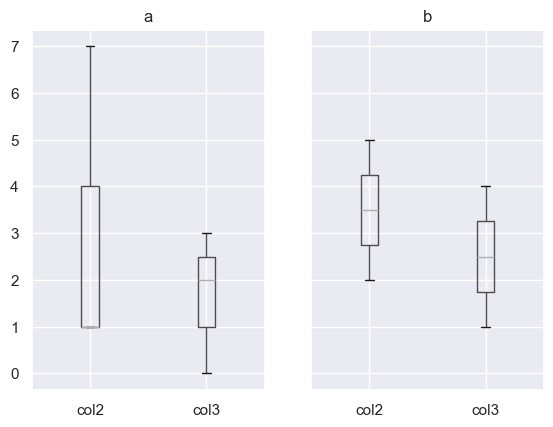

In [49]:
df = pd.DataFrame({"col1": ["a", "b", "a", "a", "b"], "col2": [1, 5, 7, 1, 2], "col3": range(5)})

df.groupby("col1").boxplot()

### Сохранение

`DataFrame` можно сохранить в `CSV`-файл, `Excel`, `parquet` и в другие форматы:

> df.to_csv("data/curr.csv")

> df.to_excel("data/curr.xsl")

> df.to_parquet("data/curr.parquet")

### Временные ряды

В `Pandas` есть обширный функционал для работы с временными рядами

In [50]:
import numpy as np
l = 365

eur = 60. + np.random.normal(0.0, 2., l).cumsum()
usd = 55. + np.random.normal(0.0, 2., l).cumsum()

df = pd.DataFrame({
            "EUR": eur,
            "USD": usd
        }, 
        index=pd.date_range("2021-11-11", periods=l, freq="1D")
)

df

,EUR,USD
2021-11-11,62.446233,57.912797
2021-11-12,60.899840,61.865748
2021-11-13,60.112627,60.527777
2021-11-14,61.158680,59.327114
2021-11-15,59.602597,58.663637
...,...,...
2022-11-06,36.021617,75.550556
2022-11-07,40.271281,72.007235
2022-11-08,41.252441,73.782284
2022-11-09,39.770674,72.775294


подсчитать средние по окну в 7 дней

In [51]:
df.rolling(window="7D").mean()

,EUR,USD
2021-11-11,62.446233,57.912797
2021-11-12,61.673036,59.889272
2021-11-13,61.152900,60.102107
2021-11-14,61.154345,59.908359
2021-11-15,60.843995,59.659414
...,...,...
2022-11-06,36.186949,75.824901
2022-11-07,37.176993,75.610996
2022-11-08,38.263009,75.289037
2022-11-09,38.966577,74.294528


# Polars

`Polars` - ещё одна библиотека для работы с концепцией `DataFrame`. Для определенных операций быстрее, проще и выразительнее `Pandas`.

In [61]:
import polars as pl

df_pl = pl.read_csv("data/currencies.csv", try_parse_dates=True)

In [53]:
df_pl

DATE,EUR,USD,GBP
date,f64,f64,f64
2017-04-01,59.8107,55.9606,69.7605
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-06,59.6948,55.894,69.4986
2017-04-07,60.0827,56.4369,70.3655
…,…,…,…
2017-04-11,60.7469,57.3896,71.1746
2017-04-12,60.3042,56.9552,70.7384
2017-04-13,60.2631,56.7556,70.9502


In [54]:
df_pl.select(["EUR", "USD"])

EUR,USD
f64,f64
59.8107,55.9606
59.8953,56.1396
60.2427,56.5553
59.6948,55.894
60.0827,56.4369
…,…
60.7469,57.3896
60.3042,56.9552
60.2631,56.7556


In [55]:
df_pl.filter(pl.col("USD") > 56)

DATE,EUR,USD,GBP
date,f64,f64,f64
2017-04-04,59.8953,56.1396,70.3429
2017-04-05,60.2427,56.5553,70.3548
2017-04-07,60.0827,56.4369,70.3655
2017-04-08,60.5687,56.9201,70.9281
2017-04-11,60.7469,57.3896,71.1746
2017-04-12,60.3042,56.9552,70.7384
2017-04-13,60.2631,56.7556,70.9502
2017-04-14,60.2867,56.6019,71.0467
2017-04-15,59.7791,56.2945,70.4413


In [56]:
df_pl.with_columns(
    new_USD=pl.when(pl.col("USD") > 56)
            .then(pl.col("USD") - 1)
            .otherwise(pl.col("USD") + 1) 
)

DATE,EUR,USD,GBP,new_USD
date,f64,f64,f64,f64
2017-04-01,59.8107,55.9606,69.7605,56.9606
2017-04-04,59.8953,56.1396,70.3429,55.1396
2017-04-05,60.2427,56.5553,70.3548,55.5553
2017-04-06,59.6948,55.894,69.4986,56.894
2017-04-07,60.0827,56.4369,70.3655,55.4369
…,…,…,…,…
2017-04-11,60.7469,57.3896,71.1746,56.3896
2017-04-12,60.3042,56.9552,70.7384,55.9552
2017-04-13,60.2631,56.7556,70.9502,55.7556


# SQLite

Открытая встраиваемая СУБД. Данные базы данных могут храниться в одном файле. Иногда удобно использовать вместе с `Pandas`. Для работы удобно использовать [ORM](https://en.wikipedia.org/wiki/Object%E2%80%93relational_mapping)-библиотеку [SQLAlchemy](https://www.sqlalchemy.org/).

Можно сохранить `DataFrame` в таблицу

In [57]:
from sqlalchemy import create_engine
from sqlalchemy import text

df = pd.read_csv("data/currencies.csv", index_col=0, header=0, parse_dates=[0])

engine = create_engine("sqlite:///:memory:")
df.to_sql("currencies", engine)    

11

Из этой таблицы можно прочитать данные и записать опять в `DataFrame`

In [58]:
with engine.connect() as conn:
    for line in conn.execute(text("SELECT * FROM currencies WHERE EUR > 60")):
        print(line)

df_new = pd.read_sql_query("SELECT * FROM currencies WHERE EUR > 60", engine)
df_new

('2017-04-05 00:00:00.000000', 60.2427, 56.5553, 70.3548)
('2017-04-07 00:00:00.000000', 60.0827, 56.4369, 70.3655)
('2017-04-08 00:00:00.000000', 60.5687, 56.9201, 70.9281)
('2017-04-11 00:00:00.000000', 60.7469, 57.3896, 71.1746)
('2017-04-12 00:00:00.000000', 60.3042, 56.9552, 70.7384)
('2017-04-13 00:00:00.000000', 60.2631, 56.7556, 70.9502)
('2017-04-14 00:00:00.000000', 60.2867, 56.6019, 71.0467)


,DATE,EUR,USD,GBP
0,2017-04-05 00:00:00.000000,60.2427,56.5553,70.3548
1,2017-04-07 00:00:00.000000,60.0827,56.4369,70.3655
2,2017-04-08 00:00:00.000000,60.5687,56.9201,70.9281
3,2017-04-11 00:00:00.000000,60.7469,57.3896,71.1746
4,2017-04-12 00:00:00.000000,60.3042,56.9552,70.7384
5,2017-04-13 00:00:00.000000,60.2631,56.7556,70.9502
6,2017-04-14 00:00:00.000000,60.2867,56.6019,71.0467


Можно создать таблицу (или взять существующую в БД)

In [59]:
with engine.begin() as conn:
    conn.execute(
        text("""
                CREATE TABLE IF NOT EXISTS words( 
                     word VARCHAR(20),
                     count INT
                );
            """)
    )
    for idx in range(10):
        conn.execute(text("INSERT INTO words(word, count) VALUES (:word, :count)"), parameters=dict(word=f"s_{idx}", count=idx))

df_new = pd.read_sql_table("words", engine)
df_new

,word,count
0,s_0,0
1,s_1,1
2,s_2,2
3,s_3,3
4,s_4,4
5,s_5,5
6,s_6,6
7,s_7,7
8,s_8,8
9,s_9,9


Пример - подсчет минимальной декабря в г. Санкт-Петербурге

In [60]:
df = pd.read_csv("data/weather.csv", index_col=0, parse_dates=[0])
df.to_sql("weather", engine, if_exists="replace")

pd.read_sql_query(
    """
        SELECT strftime('%Y', Day) AS year, MIN(t) as m
        FROM weather
        WHERE strftime('%m', Day) = '12' 
        GROUP BY year
    """, 
    engine
)   

,year,m
0,2008,-6
1,2009,-13
2,2010,-16
3,2011,-2
4,2012,-19
5,2013,-8
6,2014,-11
7,2015,-5
8,2016,-9
